# ESS Immigration

In [71]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
from essutils import utils
import altair as alt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import immigration data from *European Social Survey*
* This contains data on various countries from Rounds 1 and 7 (2002 and 2014)
* Some countries are missing data from one or the other round

In [2]:
imm = utils.get_data(utils.IMMDATA)

## The following countries are represented

In [4]:
countries = imm.cntry.unique()

### Country Groups

In [5]:
VISEGRAD = ["PL", "HU", "CZ"]
BENELUX = ["BE", "NL", "LU"]
CORE = ["DE", "FR", "IT"]
NORDIC = ["DK", "NO", "SE"]
SOUTH = ["ES", "PT", "GR", "IT", "SI"]
BALTIC = ["EE", "FI", "LT"]
OTHER = ["CH", "GB", "IE", "IL"]

In [62]:
utils.questions

{'acetalv': 'Ppl of min race/eth in area',
 'eimpcnt': 'Alw many/few from poorer cntrys',
 'gvrfgap': 'Govt shd judge generously',
 'imbleco': 'Imm take more than put',
 'imdetbs': 'Boss diff race/eth',
 'imdetmr': 'Imm marry close rel',
 'imtcjob': 'Imm take/create jobs',
 'imwbcrm': 'Imm make crime worse/better',
 'lwdscwp': 'Anti-disc law good/bad',
 'noimbro': 'Estimate num',
 'pplstrd': 'Share tradition bet/worse',
 'qfimchr': 'Qualif Christian',
 'qfimcmt': 'Qualif cmtd way of life',
 'qfimedu': 'Qualif edu',
 'qfimlng': 'Qualif lang',
 'qfimwht': 'Qualif white',
 'qfimwsk': 'Qualif skills'}

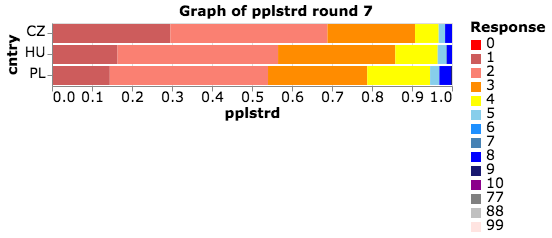

In [13]:
utils.plot_group(imm, VISEGRAD, 7, 'pplstrd')

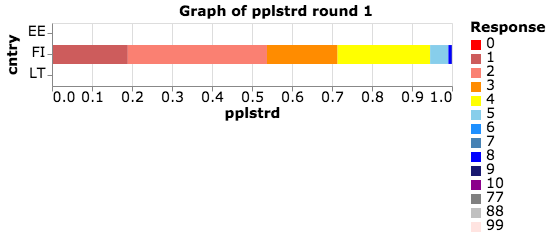

In [14]:
utils.plot_group(imm, BALTIC, 1, 'pplstrd')

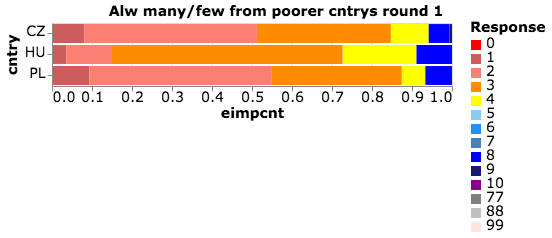

In [88]:
utils.plot_group(imm, VISEGRAD, 1, 'eimpcnt')

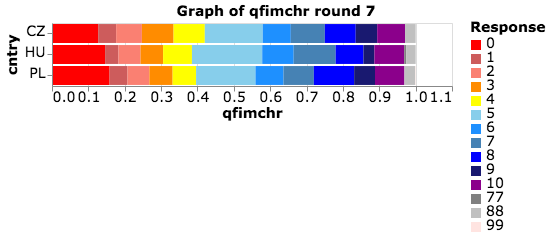

In [54]:
utils.plot_group(imm, VISEGRAD, 7, 'qfimchr')

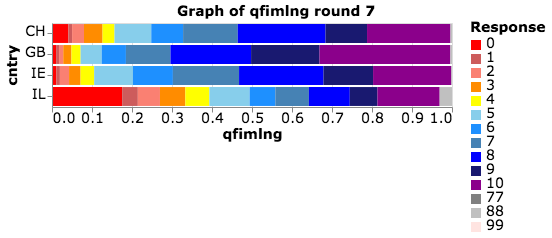

In [56]:
utils.plot_group(imm, OTHER, 7, 'qfimlng')

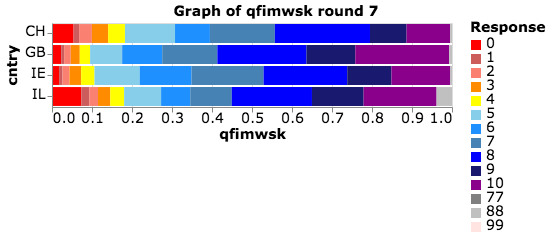

In [59]:
utils.plot_group(imm, OTHER, 7, 'qfimwsk')

In [73]:
def duoplot(grp, var):
    chart1 = utils.plot_group(imm, grp, 1, var)
    chart2 = utils.plot_group(imm, grp, 7, var)
    return alt.vconcat(chart1, chart2)

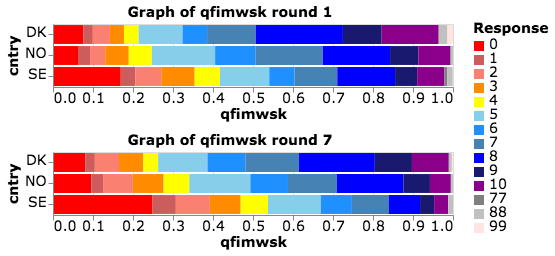

In [80]:
duoplot(NORDIC, "qfimwsk")

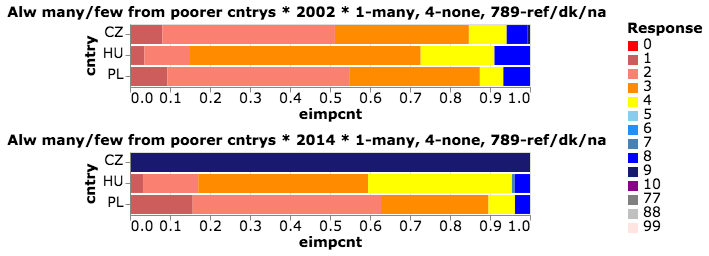

In [94]:
duoplot(VISEGRAD, 'eimpcnt')

In [95]:
c1 = duoplot(CORE, 'imdetmr')
c2 = duoplot(VISEGRAD, 'imdetmr')

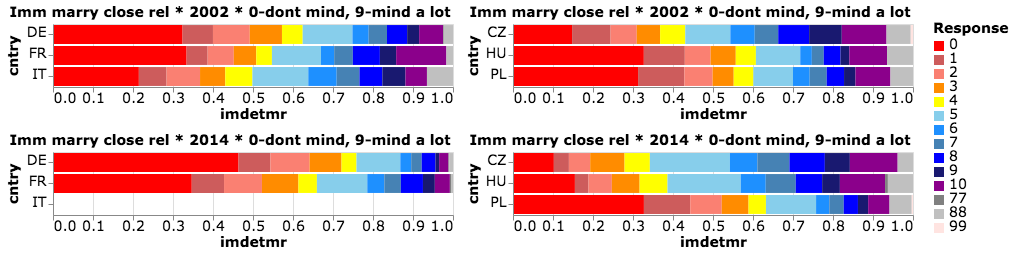

In [96]:
c1 | c2

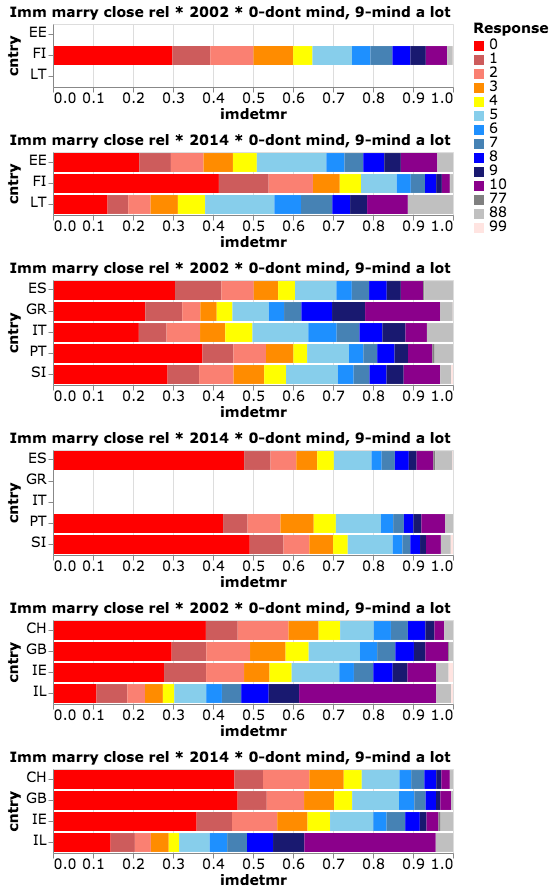

In [97]:
c1 = duoplot(BALTIC, 'imdetmr')
c2 = duoplot(SOUTH, 'imdetmr')
c3 = duoplot(OTHER, 'imdetmr')
c1 & c2 & c3